# U.S. Medical Insurance Costs

In this portfolio project, I will be demonstrating Python fundamentals by analyzing a CSV file containing medical insurance costs and investigate patterns related to patient attributes.

In [81]:
import csv, numpy, pandas, sys
import matplotlib.pyplot as plt
from collections import namedtuple
Patient_tuple = namedtuple('Patient', ['AGE', 'SEX', 'BMI', 'CHILDREN', 'SMOKER', 'REGION', 'CHARGES'])

class PatientAnalyze:
    
    def __init__(self):
        self.patients = []
        with open('insurance.csv') as insurance_file:
            self.reader = csv.reader(insurance_file, delimiter = ',')
            next(self.reader)
            for line in self.reader:
                self.patients.append(Patient_tuple(*line))
    
    def change_patients(self, new_patients):
        self.patients = new_patients
    
    def smoker_analyze(self):
        self.total_charges_non_smoker = 0
        self.total_charges_smoker = 0
        self.count_smoker = 0
        self.count_non_smoker = 0
        self.avg_age_smoker = 0
        self.avg_age_non_smoker = 0
        for patient in self.patients:
            if patient.SMOKER == 'yes':
                self.total_charges_smoker += float(patient.CHARGES)
                self.count_smoker += 1
                self.avg_age_smoker += float(patient.AGE)
            else:
                self.total_charges_non_smoker += float(patient.CHARGES)
                self.count_non_smoker += 1
                self.avg_age_non_smoker += float(patient.AGE)
        self.avg_charges_non_smoker = round(self.total_charges_non_smoker / self.count_non_smoker,2)
        self.avg_charges_smoker = round(self.total_charges_smoker / self.count_smoker,2)
        self.avg_age_non_smoker = round(self.avg_age_non_smoker / self.count_non_smoker,2)
        self.avg_age_smoker = round(self.avg_age_smoker / self.count_smoker,2)
        self.df = pandas.DataFrame({
        "Average Charges($)": [self.avg_charges_non_smoker, self.avg_charges_smoker],
        'Average Age': [self.avg_age_non_smoker, self.avg_age_smoker],
        'Count': [self.count_non_smoker, self.count_smoker]
        },index=pandas.Index(['No', 'Yes'], name='Smoker'))
        print('On average, insurance is ${} more for smokers.'.format(round(self.avg_charges_smoker-self.avg_charges_non_smoker,2)))
        return self.df.style.format(precision = 2)
    
    def graph_against_charge(self, metric):
        self.x_y = list(zip([float(getattr(self.patients[i], metric)) for i in range(len(self.patients))], [float(patient.CHARGES) for patient in self.patients]))
        self.m, self.b = numpy.polyfit([float(getattr(self.patients[i], metric)) for i in range(len(self.patients))], [float(patient.CHARGES) for patient in self.patients], deg=1)
        self.fig, self.ax = plt.subplots()
        self.ax.set_xlabel(metric)
        self.ax.set_ylabel('Insurance Charges ($)')
        self.ax.set_title('Insurance Charges by {}'.format(metric))
        self.ax.scatter(*zip(*self.x_y))
        if metric == 'AGE':
            self.x = numpy.linspace(18,65,num = 100)
        elif metric == 'BMI':
            self.x = numpy.linspace(12,55,num = 100)
        else:
            self.x = numpy.linspace(0,6,num = 6)
        self.ax.plot(self.x, self.m*self.x+self.b, '-r',label='y={}*x+{}'.format(round(self.m,2),round(self.b,2)),lw=3)
        self.ax.legend(loc='upper left')
        plt.show()
        return self.m, self.b
    
    def get_avg(self, metric):
        self.avg = 0
        for patient in self.patients:
            self.avg += float(getattr(patient, metric))
        self.avg /= len(self.patients)
        print('Average {} in Dataset is: {}'.format(metric, self.avg))
        return self.avg
    
    def get_predicted_price(self, m, b, metric, value):
        self.p_cost = round(m*value+b,2)
        print('Predicted Cost of Insurance for Someone with {} of {} is ${}'.format(metric, value, self.p_cost))
    
    def age_analyze(self, age = None):
        self.age = age
        self.avg = self.get_avg('AGE')
        self.m, self.b = self.graph_against_charge('AGE')
        if self.age is not None:
            self.get_predicted_price(m = round(self.m,2), b = round(self.b,2), metric = 'Age', value = self.age)
        return self.avg
    
    def bmi_analyze(self, bmi = None):
        self.bmi = bmi
        self.avg = self.get_avg('BMI')
        self.m, self.b = self.graph_against_charge('BMI')
        if self.bmi is not None:
            self.get_predicted_price(self.m, self.b, 'BMI', self.bmi)
        return self.avg
    def children_analyze(self, children = None):
        self.children = children
        self.avg = self.get_avg('CHILDREN')
        self.m, self.b = self.graph_against_charge('CHILDREN')
        if self.children is not None:
            self.get_predicted_price(self.m, self.b, 'CHILDREN', self.children)
        return self.avg
    def filterBy(self, age_range = None, sex = None, bmi = None, children = None, smoker = None, region = None):
        self.age_range = age_range
        self.sex = sex
        self.bmi = bmi
        self.children = children
        self.smoker = smoker
        self.region = region
        self.filters = [('AGE',self.age_range),('SEX', self.sex), ('BMI', self.bmi), ('SMOKER',self.smoker), ('REGION',self.region)]
        self.filtered_list = self.patients
        j=0
        for i in range(len(self.filters)):
            if self.filters[j][1] is None:
                self.filters.pop(j)
            else:
                j+=1
        for f in self.filters:
            if f[0] == 'AGE':
                self.filtered_list = list(filter(lambda patient: int(patient.AGE) >= f[1][0] and int(patient.AGE) <= f[1][1], self.filtered_list))
            if f[0] == 'SEX':
                self.filtered_list = list(filter(lambda patient: patient.SEX.upper() == f[1].upper(),self.filtered_list))
            if f[0] == 'BMI':
                self.filtered_list = list(filter(lambda patient: float(patient.BMI) >= f[1][0] and float(patient.BMI) <= f[1][1], self.filtered_list))
            if f[0] == 'SMOKER':
                self.filtered_list = list(filter(lambda patient: patient.SMOKER.upper() == f[1].upper(),self.filtered_list))
            if f[0] == 'REGION':
                self.filtered_list = list(filter(lambda patient: patient.REGION.lower() in f[1],self.filtered_list))
        return self.filtered_list

    def region_analyze(self):
        self.by_region = {}
        self.by_region_analyze = {}
        for patient in self.patients:
            if patient.REGION not in self.by_region:
                self.by_region.update({patient.REGION: [patient]})
            else:
                self.by_region[patient.REGION].append(patient)
        for region, patients in self.by_region.items():
            total_age = 0
            total_bmi = 0
            total_children = 0
            total_charges = 0
            for patient in patients:
                total_age += float(patient.AGE)
                total_bmi += float(patient.BMI)
                total_children += float(patient.CHILDREN)
                total_charges += float(patient.CHARGES)
            avg_age = total_age/len(patients)
            avg_bmi = total_bmi/len(patients)
            avg_children = total_children/len(patients)
            avg_charges = total_charges/len(patients)
            self.by_region_analyze.update({patient.REGION: [avg_age, avg_bmi, avg_children, avg_charges]})
        
        self.df = pandas.DataFrame(self.by_region_analyze,index=pandas.Index(['Average Age', 'Average BMI', 'Average Children', 'Average Charges'], name='Metric'))
        return self.df
        

In the code above, I created a class for analyzing the insurance data by smoker status, age, BMI, and number of children. For smoker status, it creates a table with Average Charges, Average Age, and Count based on status with a message that calculates in the average increase in price smokers. For age, BMI, and number of children, they all create a graph depicting the scattered data with a line of linear regression and allows one to enter a parameter value aligning with the metric to get a predicted cost for insurance based on that parameter. The filterBy function allows one to filter the instance of the class's data with any number of combinations of the columns. Lastly, the region analyze function calculates the average age, bmi, number of children, and charges by region.

As a sidenote, this project intentionally uses a mix of data containers like namedtuples and dataframes to showcase different ways data can be manipulated.

In [82]:
pA = PatientAnalyze()
pA.region_analyze()

,southwest,southeast,northwest,northeast
Metric,,,,
Average Age,39.455385,38.939560,39.196923,39.268519
Average BMI,30.596615,33.355989,29.199785,29.173503
Average Children,1.141538,1.049451,1.147692,1.046296
Average Charges,12346.937377,14735.411438,12417.575374,13406.384516


On this first run, I am running the analysis on all of the data without filtering. Based on this analysis some key takeaways is that on average smokers pay $23615.96 more, average age, BMI, and number of children are 39.21, 30.66, and 1.09 respectively. Above one can see how each region compares to each other, the Southeast having the highest charges and BMI.

In [83]:
pA.smoker_analyze()

On average, insurance is $23615.96 more for smokers.


,Average Charges($),Average Age,Count
Smoker,,,
No,8434.27,39.39,1064
Yes,32050.23,38.51,274


Average AGE in Dataset is: 39.20702541106129


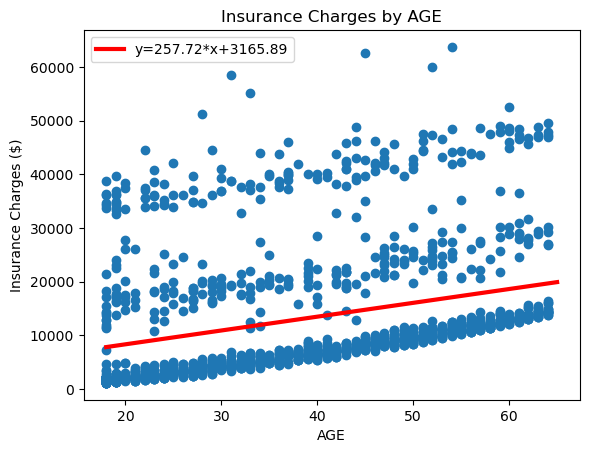

Predicted Cost of Insurance for Someone with Age of 28 is $10382.05
Average BMI in Dataset is: 30.663396860986538


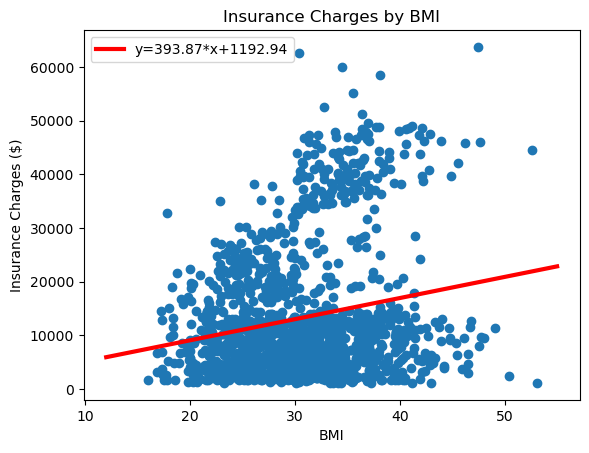

Predicted Cost of Insurance for Someone with BMI of 30 is $13009.13
Average CHILDREN in Dataset is: 1.0949177877429


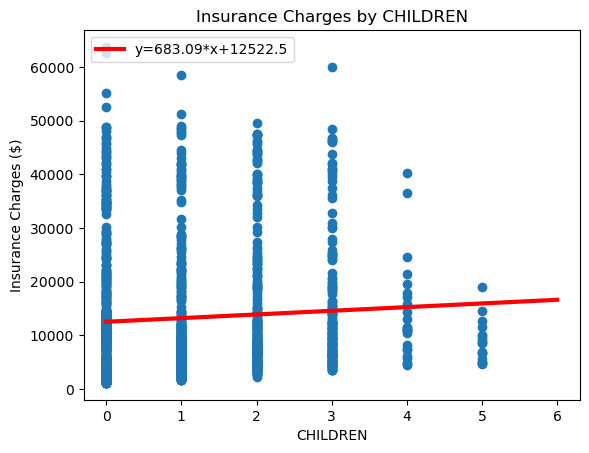

Predicted Cost of Insurance for Someone with CHILDREN of 3 is $14571.76


1.0949177877429

In [84]:
pA.age_analyze(28)
pA.bmi_analyze(30)
pA.children_analyze(3)

Below I demonstrate how the filter function allows one to analyze the data in different ways based on the selected parameters.

In [85]:
pA2 = PatientAnalyze()
pA2.change_patients(pA2.filterBy(sex = 'female'))
pA.change_patients(pA.filterBy(sex = 'male'))
avg_male = pA.get_avg('CHARGES')
avg_female = pA2.get_avg('CHARGES')
print('Average Difference Between Male and Female Patients is: ${} (Men Paying More)'.format(avg_male-avg_female))


Average CHARGES in Dataset is: 13956.751177721886
Average CHARGES in Dataset is: 12569.57884383534
Average Difference Between Male and Female Patients is: $1387.1723338865468 (Men Paying More)
